<h1> Lecture 20

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul>
<li>Percentiles  </li><br>
    
<li>Estimation  </li><br>

<li>Bootstrap  </li><br>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

### Percentiles

<h3>Determine manually the 55th percentile of the set<br>
    
$$x=[43, 20, 51, 7, 28, 34].$$
</h3>

<h4>Step 0: Create the data array:</h4>

In [2]:
x = make_array(43, 20, 51, 7, 28, 34)
x

array([43, 20, 51,  7, 28, 34])

### percentile(percent, array)

In [3]:
percent = 34
percentile(percent, x)

28

<h4>The <tt>percentile</tt> function does all the work for us.</h5>

### The median and the 50th percentile (for this class) can be considered as the same thing

But sometimes they output different results (for even length arrays, we accept either)

In [4]:
# Even Length

In [5]:
percentile(50, x)

28

In [6]:
np.median(x)

31.0

In [7]:
# Odd Length

In [8]:
np.median(make_array(1,2,3,4,5))

3.0

In [9]:
percentile(50, make_array(1,2,3,4,5))

3

SLIDE: Discussion Question

SLIDE: Estimation

<h2>City of San Francisco Employees: Sample Median</h2>

In [10]:
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


<h3>Declutter: Remove extraneous columns</h3>

In [11]:
sf=sf.select('Job Family','Job','Total Compensation')
sf

Job Family,Job,Total Compensation
"Lab, Pharmacy & Med Techs",Water Qualitytech I/II,117767
Journeyman Trade,Soft Floor Coverer,41209.8
"Payroll, Billing & Accounting",Health Care Billing Clerk 2,110561
Management,Food Service Mgr Administrator,38625
Protection & Apprehension,School Crossing Guard,11438.2
Police Services,Police Officer,3188.65
Nursing,Nurse Practitioner,260281
Street Transit,Transit Operator,111057
Legal & Court,Attorney (Civil/Criminal),186781
Community Development,Emp & Training Spec 2,103610


<h3>Who had the top five 'Total Compensation' and what were their jobs?</h3>

In [12]:
# Who is making the most money
sf.sort('Total Compensation', descending=True).show(5)

Job Family,Job,Total Compensation
Administrative & Mgmt (Unrep),Chief Investment Officer,648875
Med Therapy & Auxiliary,Asst Med Examiner,480509
Med Therapy & Auxiliary,Asst Med Examiner,427219
Management,Dept Head V,426686
Management,"Adm, SFGH Medical Center",422800


<h3>Who had the lowest five 'Total Compensation' and what were their jobs?</h3>

In [13]:
# Who is making the least money
sf.sort('Total Compensation', descending=False).show(5)

Job Family,Job,Total Compensation
Fire Services,Firefighter,-423.76
Public Service Aide,PS Aide Health Services,-410.61
Correction & Detention,"Counselor, Juvenile Hall",-159.12
Information Systems,IS Business Analyst-Senior,-26.53
Professional Engineering,Planner 1,-9.51


<h3>Clearly, the data must be cleaned, so spurious rows like the above are removed.</h3>

<h3>Let's impose a lower cutoff (minimum salary cutoff) for salaries.<br>
    
Assume half-time employment&mdash;20 hours a week.<br>
    
Assume minimum wage of $10/hour.<br>
</h3>

![title](2015-min-wage-schedule-san-francisco.png)

[Source: GovDocs](https://www.govdocs.com/san-francisco-2015-minimum-wage-increase/)

<h3>Assume a round figure of $10/hour for minimum wage in 2015.</h3>

In [14]:
min_wage_per_hour = 10  #minimum hourly wage
hours_per_week    = 20  #half-time employee
weeks_per_year    = 52

min_salary=min_wage_per_hour * hours_per_week * weeks_per_year
min_salary

10400

<h3>Keep only the rows where 'Total Compensation' is at least <tt>min_salary</tt>:</h3>

In [15]:
sf = sf.where('Total Compensation', are.above(min_salary))#.sort('Total Compensation', descending=True)
sf

Job Family,Job,Total Compensation
"Lab, Pharmacy & Med Techs",Water Qualitytech I/II,117767
Journeyman Trade,Soft Floor Coverer,41209.8
"Payroll, Billing & Accounting",Health Care Billing Clerk 2,110561
Management,Food Service Mgr Administrator,38625
Protection & Apprehension,School Crossing Guard,11438.2
Nursing,Nurse Practitioner,260281
Street Transit,Transit Operator,111057
Legal & Court,Attorney (Civil/Criminal),186781
Community Development,Emp & Training Spec 2,103610
Street Transit,Transit Operator,116770


<h3>Population Histogram</h3>

<h4>Median 'Total Compensation' of the entire data set:</h4>

In [16]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median 

107516.69

<h4>Maximum 'Total Compensation' of the entire data set:</h4>

In [17]:
pop_max = max(sf.column('Total Compensation'))
pop_max

648875.24

<h4>Minimum 'Total Compensation' of the entire data set:</h4>

In [18]:
pop_min = sf.column('Total Compensation').min()
pop_min

10403.15

<h4>Set the histogram bins.</h4>

In [19]:
sf_bins = np.arange(0, 700000, 25000)
sf_bins

array([     0,  25000,  50000,  75000, 100000, 125000, 150000, 175000,
       200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000,
       400000, 425000, 450000, 475000, 500000, 525000, 550000, 575000,
       600000, 625000, 650000, 675000])

<h4>Plot the Population Distribution</h4>

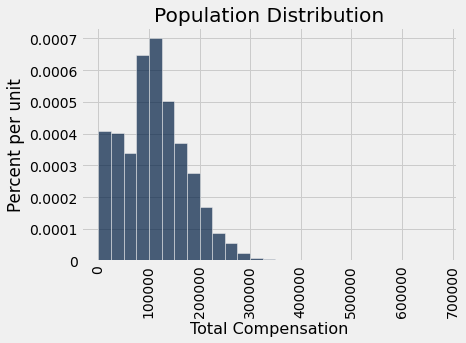

In [20]:
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

<h3>Now take a sample of size <tt>sample_size</tt> <i>different</i> employees:</h3>

In [21]:
sample_size=300
sample_size

300

In [22]:
our_sample = sf.sample(sample_size, with_replacement=False)
our_sample.show(5)

Job Family,Job,Total Compensation
"Budget, Admn & Stats Analysis",Administrative Analyst,34039.3
Nursing,Special Nurse,15211.6
Professional Engineering,Landscape Architect Assoc 1,130288
Professional Engineering,Junior Engineer,21565.7
Recreation,Swimming Instructor,14760.6


<h4>Median 'Total Compensation' for our sample is:</h4>

In [23]:
sample_median = percentile(50, our_sample.column('Total Compensation'))
sample_median

100115.73

<h4>Compare with the population median.</h4>

In [24]:
pop_median

107516.69

SLIDE: Variability of the Estimate

<h3>Sample Histogram</h3>

<h4>Plot the Sample Distribution (using the same bins as for the population)</h4>

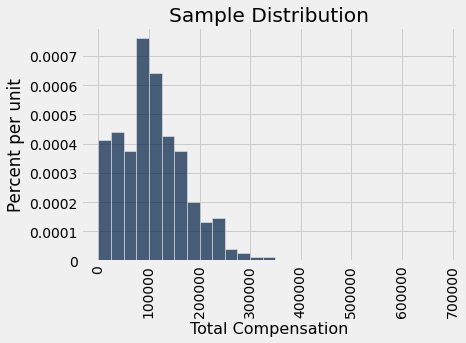

In [25]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

# Variability of the Estimate

In [26]:
def generate_sample_median(sample_size):
    our_sample = sf.sample(sample_size, with_replacement=False)
    return percentile(50, our_sample.column('Total Compensation'))

In [27]:
sample_size=300
sample_median = generate_sample_median(sample_size)
sample_median

101389.79

In [28]:
error = sample_median - pop_median
error

-6126.900000000009

<h4>Repeat the cell below manually a few times.</h4>

In [29]:
sample_median = generate_sample_median(sample_size)
error = sample_median - pop_median
error

-5864.5

# Quantifying Uncertainty

In [30]:
num_simulations = 1000
sample_size = 300

#Create a blank sample_medians array
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = generate_sample_median(sample_size)
    sample_medians = np.append(sample_medians, new_median)

<h4>Minimum Sample Median</h4>

In [31]:
min(sample_medians)

92779.72

<h4>Maximum Sample Median</h4>

In [32]:
max(sample_medians)

119103.76

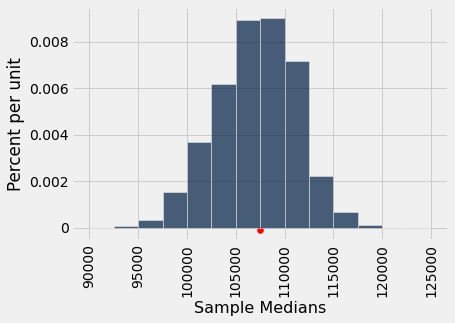

In [33]:
median_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians).hist(bins = median_bins)
#Superimpose the true population median
plots.scatter(pop_median, -1e-6, color="red");

<h4>Create an array of sample errors:</h4>

In [34]:
sample_errors = sample_medians - pop_median

<h4>Minimum Sample Error:</h4>

In [35]:
min(sample_errors)

-14736.970000000001

<h4>Maximum Sample Error:</h4>

In [36]:
max(sample_errors)

11587.069999999992

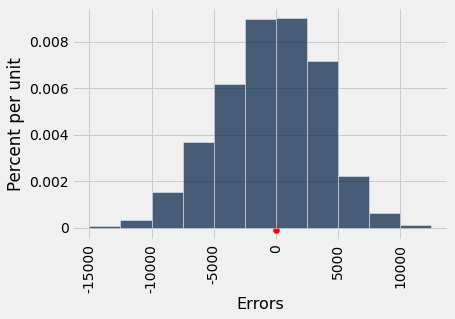

In [37]:
bin_width=2500

error_bins = np.arange(-15000, 12501, bin_width)

Table().with_column(
    'Errors', sample_errors).hist(bins = error_bins)

plots.scatter(0, -1e-6, color="red");

SLIDE: Where to Get Another Sample?

In [38]:
# Stopping point for today!
# Questions?